In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sns

import pandas as pd
from helper import get_news_dataset, get_data, create_classes

pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression


# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from math import sqrt

## Import Dataset

In [17]:
DATA_SET_URL = ["https://www.dropbox.com/sh/euppz607r6gsen2/AACYNkq6O4UEjacsBy6FhT6La/Wine%20Quality%20Ratings%20and%20Chemicals?dl=1"]
DATA_SET = "./data/winequality-white.csv"

## Load Dataset

In [18]:
get_data(DATA_SET_URL)
data = pd.read_csv(DATA_SET, delimiter=";")
# data = pd.read_csv(data_path, error_bad_lines=False, encoding="ISO-8859-1") 
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


## Preprocess sum_noise dataset

- Understanding the data

- Remove 'Instance' as it simply represents the row number
- Extract 'Nosiy Target' as regression target
- Extract 'Nosiy Class' as classification target
- Extract rest columns as explananatory variables
- Apply Feature Scaling to the dataset 

- Ensure all dataframe has been converted to numpy array


## Understanding the data

#### Correlation of Features

In [19]:
def plot_pearson_correlation_of_features(train):
    colormap = plt.cm.viridis
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(train.astype(float).corr(),linewidths=0.5,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

In [20]:
def plot_correlation_features_against_target(train, target):
    for column in train:
        color = np.random.rand(3,)
        plt.scatter(train[column], train[target], color=color)
        plt.title(column + " against " + target)
        plt.xlabel(column)
        plt.ylabel(target)
        plt.show()

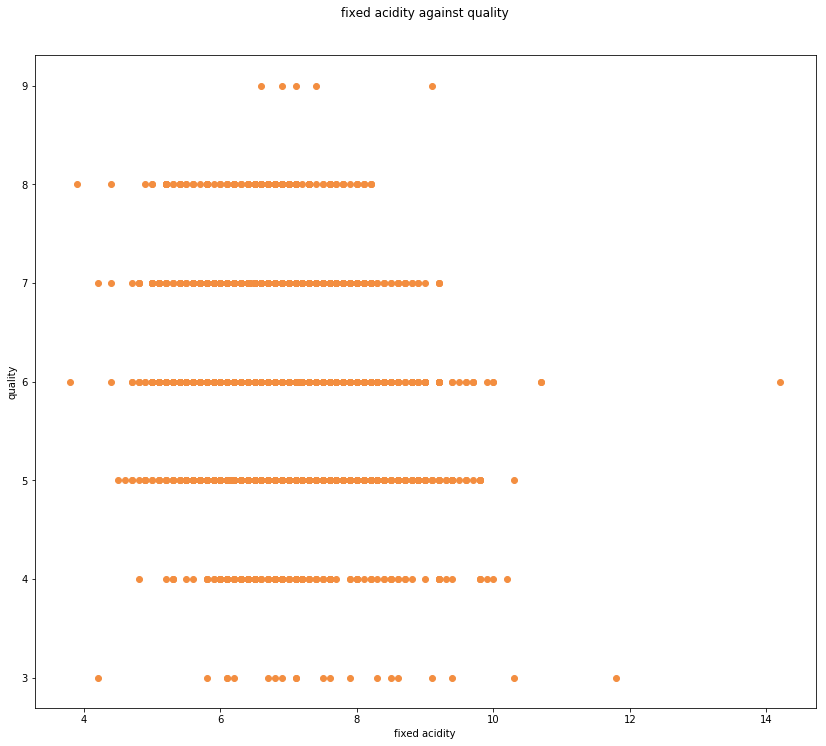

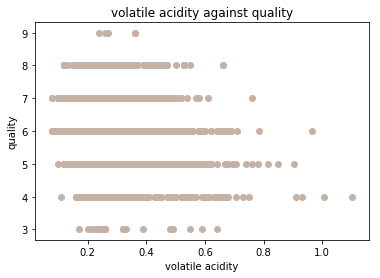

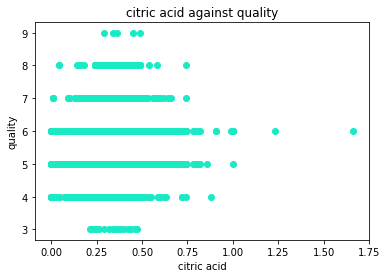

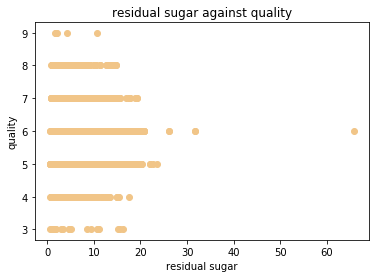

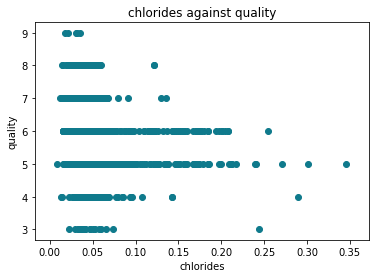

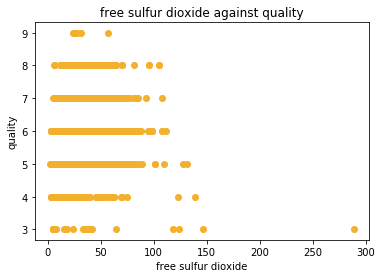

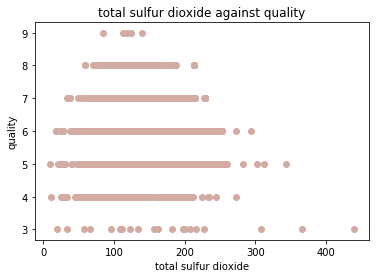

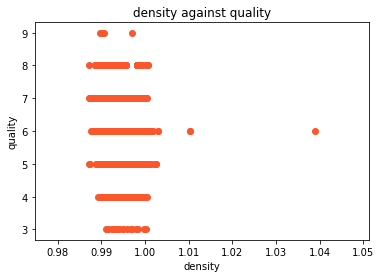

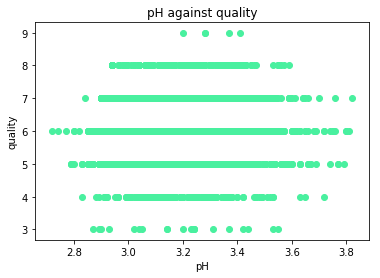

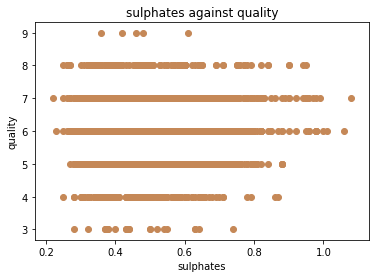

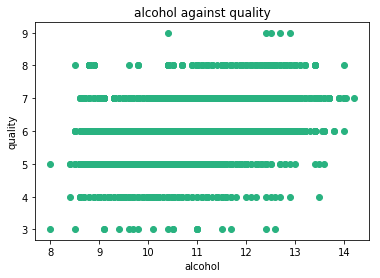

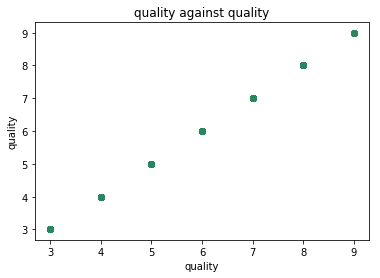

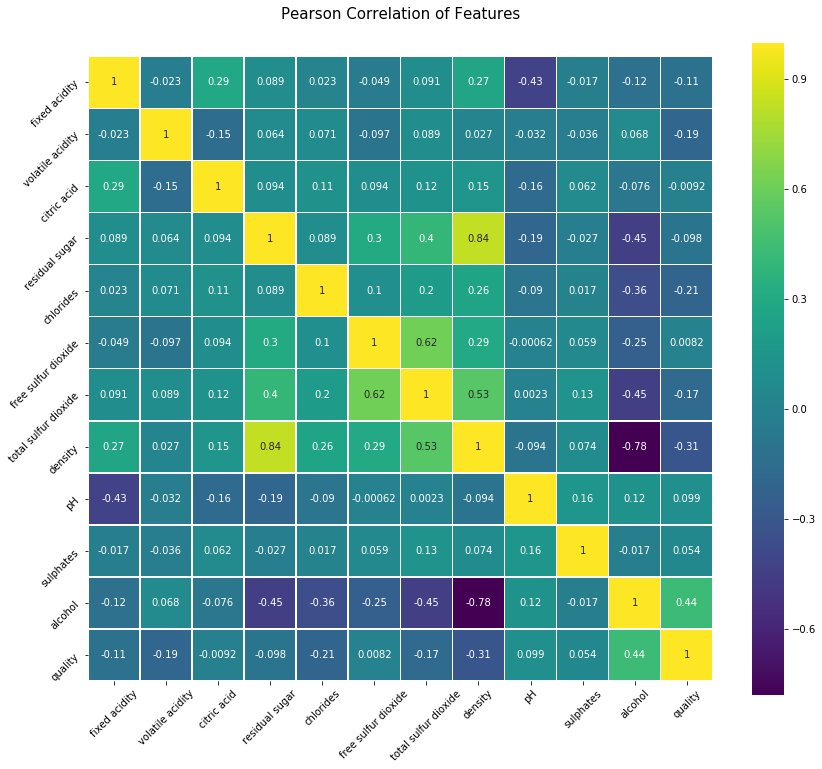

In [21]:
plot_correlation_features_against_target(data, "quality")
plot_pearson_correlation_of_features(data)

## Load datasets sumdata

In [18]:
sumdata = pd.read_csv(sumdata_path, delimiter=";")  
sumdata.head(n=2)

,Instance,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5 (meaningless but please still use it),Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Target,Target Class
0,1,57326,68791,82549,99059,72624,142645,171174,205409,246491,295789,1369233,Very Large Number
1,2,87859,105431,126517,151820,19982,218621,262345,314814,377777,453332,2098516,Very Large Number


## Preprocess sumdata dataset

- Remove 'Instance' as it simply represents the row number
- Extract 'Target' as regression target
- Extract 'Target Class' as classification target
- Extract rest of the columns as explananatory variables
- Apply Feature Scaling to the dataset 

- Ensure all dataframe has been converted to numpy array


In [19]:
# Use 'Nosiy Target' as regression target
sumdata_reg_Y = sumdata['Target'].values.reshape(-1, 1)

# Use 'Nosiy Target Class' Large Number as classification target
le = LabelEncoder() 
sumdata_classif_Y = le.fit_transform(sumdata['Target Class'])

# Use rest of columns as explananatory variables 
sumdata_X = sumdata.iloc[:, 1:-2].values

 
scX = StandardScaler() #standardising features
scY = StandardScaler() # standardising y 
sumdata_X      = scX.fit_transform(sumdata_X)
sumdata_reg_Y  = scX.fit_transform(sumdata_reg_Y)




/home/jibin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)



## Load Taxi dataset

In [20]:
taxi = pd.read_csv(taxi_path, delimiter=",")
taxi.head(n=10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


## Preprocess Taxi dataset

- Use 'trip_duration' as regression target
- Split 'trip_duration' into 2 part, bigger then mean & less then mean, and use it as classification target
- For explananatory variables, use the following numerical variable and categorical variables
    - Numerical
        - pickup_latitude
        - pickup_longitude
        - dropoff_latitude
        - dropoff_longitude
        - passenger_count
- Apply Feature Scaling to the dataset 

- Ensure all dataframe has been converted to numpy array


In [22]:
# Use 'trip_duration' as regression target
taxi_reg_Y = taxi.loc[:, ['trip_duration']]

# Use following features to predict price
features = ['pickup_latitude', 'dropoff_latitude', 'dropoff_longitude', 'pickup_longitude', 'passenger_count']

taxi[features[0]]
filtered_table = taxi[features[0]]
filtered_table

for c in features[1:]:
    filtered_table = pd.concat([filtered_table, taxi[c]], axis=1)
filtered_table

# get explanatory variable
taxi_reg_X = filtered_table[:].values

## get the regression target and classification target

# I am encoding price as categorical variable as the classification target, e.g try to determine the house condition
taxi_classif_Y = np.zeros(taxi.shape[0])
taxi_mean = taxi['trip_duration'].values.mean()
for i, r in enumerate(taxi['trip_duration']):
    if r > taxi_mean:
        taxi_classif_Y[i] = 1
    else:
        taxi_classif_Y[i] = 0
        
# I am using price as the regression target
taxi_reg_Y = taxi['trip_duration'].values.reshape(-1,1)


# Apply Feature Scaling to the classification variable
scX = StandardScaler()
scY = StandardScaler()
taxi_classif_X = scX.fit_transform(taxi_reg_X[:])
taxi_reg_X = scX.fit_transform(taxi_reg_X)
taxi_reg_Y = scY.fit_transform(taxi_reg_Y)
taxi_reg_X

/home/jibin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[ 0.51749362,  0.38457476,  0.12436886, -0.12226117, -0.50563722],
       [-0.37581901, -0.57530291, -0.36897023, -0.09772722, -0.50563722],
       [ 0.39591029, -1.16221959, -0.45180541, -0.07814311, -0.50563722],
       ..., 
       [ 0.54371292, -1.23789591, -0.43906154,  0.20249083, -0.50563722],
       [-0.05654676,  0.14787366, -0.01721773, -0.12118512, -0.50563722],
       [ 0.93758258,  1.08064815,  0.00859401, -0.08535264, -0.50563722]])

## News dataset

In [23]:
news = get_news_dataset() 
news.head(n=1)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875,593


## Preprocess news dataset
- Below are the features  that will be selected 
-

In [24]:
columns= [ ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords',
       ' data_channel_is_entertainment',
       ' data_channel_is_world',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', ' global_subjectivity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',' title_subjectivity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']

#### Classes
- 0 - 10            class 1
- 10 - 100          class 2 
- 101 - 1000        class 3
- 1001 - 10,000     class 4
- 10,001 - 100,000  class 5
- 100,001 -         class 6

In [99]:
news = news[columns] 
# Classification the target values 
news['label'] = news.apply(create_classes, axis=1)


In [100]:
news_reg_Y = news[' shares'].values.reshape(-1, 1)

news_reg_X = news.iloc[:, 0:-2].values # the last 2 columns are the target values 
# no need to label encode as they already encoded
news_classif_Y = news['label'] 

scX = StandardScaler() #standardising features
scY = StandardScaler() # standardising y 
news_reg_X  = scX.fit_transform(news_reg_X)
news_reg_Y  = scX.fit_transform(news_reg_Y)
 

/Users/kiyim/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fits Algorithms to datasets

In [29]:
data_chunks = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000,
1000000, 5000000, 10000000, 50000000, 100000000]

In [30]:

def root_mean_square_error(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

In [31]:
def model( X, y, dataset_name, algorithm, isReg, algo_params={}): 
    """
        Iterates through each chunk and does k fold on it
    """
    
    print ("Algorithm: {}\nDataset: {}\n".format( algorithm.__name__, dataset_name))
    for chunk in data_chunks:
        
        # if chunk is greater than the no. of examples quite from the chunking
        if chunk > X.shape[0]: 
            break
        
        print ("Chunk Size: {}\n".format(chunk))
        
        # generate the chunk file
        current_X = X[0:chunk]
        current_y = y[0:chunk]
        
        kFoldModelling(current_X, current_y, 10, algorithm, isReg, algo_params)
        
         
         
    

In [32]:
def kFoldModelling (X, y, kfolds, algorithm, isReg, algo_params):
    """
        K fold cross validation
    """
    
    kf = KFold(n_splits=kfolds, shuffle=True)
    rmse = np.zeros((10,1))
    mae = np.zeros((10,1))
    accuracy = np.zeros((10,1))
    precision = np.zeros((10,1))
    
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
      
        # fit the model to the datset
        lm = algorithm(**algo_params)
        lm.fit(X_train, y_train.ravel())
        preds = lm.predict(X_test)
        if isReg:     
            rmse[i] = root_mean_square_error(y_test, preds)  # RMSE https://www.kaggle.com/wiki/RootMeanSquaredError
            mae[i] = mean_absolute_error(y_test, preds)
        else:
            accuracy[i] = accuracy_score(y_test, preds)
            
            precision[i] = precision_score(y_test, preds,average="weighted") 
    
    if isReg:     
        print ("Iteration: {}\nRMSE: {}\nMAE: {}\n".format( i, rmse.mean(), mae.mean()))
    else:
        print ("Iteration: {}\Accuracy: {}\nPrecision: {}\n".format( i, accuracy.mean(), precision.mean()))
    

## Fits Regression Algorithms to datasets

    - Linear Regression
    - Random Forest Regression
    

In [33]:
# Linear Regression
# model(sumdata_noise_X, sumdata_noise_reg_Y, "The Sum Dataset(with noise)", LinearRegression, True)
# model(sumdata_X, sumdata_reg_Y, "The Sum Dataset(without noise)",  LinearRegression, True) 
# model(news_reg_X, news_reg_Y, "News dataset", LinearRegression, True)
model(taxi_reg_X, taxi_reg_Y, "Taxi dataset", LinearRegression, True)

# RandomForestRegression 
# model(sumdata_noise_X, sumdata_noise_reg_Y,"The Sum Dataset(with noise)",  RandomForestRegressor, True)
# model(sumdata_X, sumdata_reg_Y, "The Sum Dataset(without noise)", RandomForestRegressor, True) 
# model(news_reg_X, news_reg_Y, "News dataset", RandomForestRegressor, True)
model(taxi_reg_X, taxi_reg_Y, "Taxi dataset", RandomForestRegressor, True)



Algorithm: LinearRegression
Dataset: Taxi dataset

Chunk Size: 100

Iteration: 9
RMSE: 0.11155500867178
MAE: 0.09156933264629824

Chunk Size: 500

Iteration: 9
RMSE: 0.11360612643843022
MAE: 0.08378482898560377

Chunk Size: 1000

Iteration: 9
RMSE: 0.26479833923462703
MAE: 0.10308393788631387

Chunk Size: 5000

Iteration: 9
RMSE: 0.45253543993268613
MAE: 0.10571601161607276

Chunk Size: 10000

Iteration: 9
RMSE: 0.45794486849433014
MAE: 0.10392645854704356

Chunk Size: 50000

Iteration: 9
RMSE: 0.5930010254712006
MAE: 0.10871990482093578

Chunk Size: 100000

Iteration: 9
RMSE: 0.5662023365468947
MAE: 0.10566301411165921

Chunk Size: 500000

Iteration: 9
RMSE: 0.7147366890827577
MAE: 0.1095686070025125

Chunk Size: 1000000

Iteration: 9
RMSE: 0.9508529418238176
MAE: 0.11305067617082953

Algorithm: RandomForestRegressor
Dataset: Taxi dataset

Chunk Size: 100

Iteration: 9
RMSE: 0.10441745147937284
MAE: 0.08091047626972786

Chunk Size: 500

Iteration: 9
RMSE: 0.08811768052100381
MAE: 0.06

### Classification algorithms

In [ ]:
# Logistic regression
# model(sumdata_noise_X, sumdata_noise_classif_Y, "The Sum Dataset(with noise)", LogisticRegression, False)
# model(sumdata_X, sumdata_classif_Y, "The Sum Dataset(without noise)", LogisticRegression, False)
# model(news_reg_X, news_classif_Y, "News dataset", LogisticRegression, False)
model(taxi_classif_X, taxi_classif_Y, "House dataset", LogisticRegression, False)
# Suport Vector Classification
from sklearn.svm import SVC
# model(sumdata_noise_X, sumdata_noise_classif_Y, "The Sum Dataset(with noise)", SVC, False)
# model(sumdata_X, sumdata_classif_Y, "The Sum Dataset(without noise)", SVC, False)
# model(news_reg_X, news_classif_Y, "News dataset", SVC, False)
model(taxi_classif_X, taxi_classif_Y, "Taxi Dataset", SVC, False)
